# 1.Reading The Data

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ajaynagarajm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd

data = pd.read_csv("hasoc.csv")

df = data[['text', 'task1', 'task2']]

df.head()

,text,task1,task2
0,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF,PRFN
1,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN
2,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE
3,RT @SheLoveTimothy: He ain’t on drugs he just ...,NOT,PRFN
4,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE


# 2 . Pre-Processing

### 2.1 Lower Casing

In [3]:
df['clean_msg'] = df['text'].apply(lambda x: x.lower())
df['clean_msg'].head()

/tmp/ipykernel_49706/2257667112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_msg'] = df['text'].apply(lambda x: x.lower())


0    hate wen females hit ah nigga with tht bro 😂😂,...
1    rt @airjunebug: when you're from the bay but y...
2    rt @donaldjtrumpjr: dear democrats: the americ...
3    rt @shelovetimothy: he ain’t on drugs he just ...
4    rt @tavianjordan: summer ‘19 i’m coming for yo...
Name: clean_msg, dtype: object

### 2.2  Removal of Punctuations

In [4]:
#library that contains punctuation
import string
# list of all punctuations we have
print(string.punctuation)
 
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
 
#storing the punctuation free text for both training and testing data
df['clean_msg'] = df['clean_msg'].apply(lambda x:remove_punctuation(x))
df['clean_msg'].head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


/tmp/ipykernel_49706/1785397522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_msg'] = df['clean_msg'].apply(lambda x:remove_punctuation(x))


0    hate wen females hit ah nigga with tht bro 😂😂 ...
1    rt airjunebug when youre from the bay but your...
2    rt donaldjtrumpjr dear democrats the american ...
3    rt shelovetimothy he ain’t on drugs he just bo...
4    rt tavianjordan summer ‘19 i’m coming for you ...
Name: clean_msg, dtype: object

### 2.3 Removal of Stopwords in Text Pre-processing

In [5]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [6]:
#defining function for tokenization
import re
#whitespace tokenizer
from nltk.tokenize import WhitespaceTokenizer
tk = WhitespaceTokenizer()
def tokenization(text):
    return tk.tokenize(text)
 
#applying function to the column for making tokens in both Training and Testing data
df['tokenised_clean_msg']= df['clean_msg'].apply(lambda x: tokenization(x))
df['tokenised_clean_msg'].head()

0    [hate, wen, females, hit, ah, nigga, with, tht...
1    [rt, airjunebug, when, youre, from, the, bay, ...
2    [rt, donaldjtrumpjr, dear, democrats, the, ame...
3    [rt, shelovetimothy, he, ain’t, on, drugs, he,...
4    [rt, tavianjordan, summer, ‘19, i’m, coming, f...
Name: tokenised_clean_msg, dtype: object

In [7]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
 
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
 
#applying the function for removal of stopwords
df['cleaned_tokens']= df['tokenised_clean_msg'].apply(lambda x:remove_stopwords(x))
df['cleaned_tokens'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ajaynagarajm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [hate, wen, females, hit, ah, nigga, tht, bro,...
1    [rt, airjunebug, youre, bay, youre, really, ny...
2    [rt, donaldjtrumpjr, dear, democrats, american...
3    [rt, shelovetimothy, ain’t, drugs, bored, shit...
4    [rt, tavianjordan, summer, ‘19, i’m, coming, b...
Name: cleaned_tokens, dtype: object

### 2.6 Removing Emojis

In [8]:
! pip install clean-text

In [9]:
#df['cleaned_tokens'] = df['cleaned_tokens'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)
from cleantext import clean

def rem_em(text):
    clean_txt = clean(text, no_emoji=True)
    return clean_txt

df['cleaned_tokens'] = df['cleaned_tokens'].apply(lambda x: rem_em(x))
df['cleaned_tokens']

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


0       ['hate', 'wen', 'females', 'hit', 'ah', 'nigga...
1       ['rt', 'airjunebug', 'youre', 'bay', 'youre', ...
2       ['rt', 'donaldjtrumpjr', 'dear', 'democrats', ...
3       ['rt', 'shelovetimothy', 'ain't', 'drugs', 'bo...
4       ['rt', 'tavianjordan', 'summer', ''19', 'i'm',...
                              ...                        
3789    ['rt', 'filthyart', 'tonight', 'tonight', 'ton...
3790                    ['rt', 'abbn0rmal', 'eat', 'ass']
3791    ['rt', 'flytpa', 'breaking', 'news', 'tpa', 'g...
3792    ['rt', 'starrtharapper', 'it's', 'hr', 'fuck',...
3793               ['dont', 'know', 'iam', 'know', 'you']
Name: cleaned_tokens, Length: 3794, dtype: object

In [10]:
df

,text,task1,task2,clean_msg,tokenised_clean_msg,cleaned_tokens
0,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF,PRFN,hate wen females hit ah nigga with tht bro 😂😂 ...,"[hate, wen, females, hit, ah, nigga, with, tht...","['hate', 'wen', 'females', 'hit', 'ah', 'nigga..."
1,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN,rt airjunebug when youre from the bay but your...,"[rt, airjunebug, when, youre, from, the, bay, ...","['rt', 'airjunebug', 'youre', 'bay', 'youre', ..."
2,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE,rt donaldjtrumpjr dear democrats the american ...,"[rt, donaldjtrumpjr, dear, democrats, the, ame...","['rt', 'donaldjtrumpjr', 'dear', 'democrats', ..."
3,RT @SheLoveTimothy: He ain’t on drugs he just ...,NOT,PRFN,rt shelovetimothy he ain’t on drugs he just bo...,"[rt, shelovetimothy, he, ain’t, on, drugs, he,...","['rt', 'shelovetimothy', 'ain't', 'drugs', 'bo..."
4,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE,rt tavianjordan summer ‘19 i’m coming for you ...,"[rt, tavianjordan, summer, ‘19, i’m, coming, f...","['rt', 'tavianjordan', 'summer', ''19', 'i'm',..."
...,...,...,...,...,...,...
3789,RT @FilthyArt_: TONIGHT TONIGHT TONIGHT \n\nCa...,NOT,NONE,rt filthyart tonight tonight tonight \n\ncatch...,"[rt, filthyart, tonight, tonight, tonight, cat...","['rt', 'filthyart', 'tonight', 'tonight', 'ton..."
3790,RT @abbn0rmal_: Eat my ass,HOF,PRFN,rt abbn0rmal eat my ass,"[rt, abbn0rmal, eat, my, ass]","['rt', 'abbn0rmal', 'eat', 'ass']"
3791,RT @FlyTPA: BREAKING NEWS: TPA is about to get...,NOT,NONE,rt flytpa breaking news tpa is about to get ev...,"[rt, flytpa, breaking, news, tpa, is, about, t...","['rt', 'flytpa', 'breaking', 'news', 'tpa', 'g..."
3792,RT @StarrThaRapper: It’s been a hr FUCK THAT G...,HOF,PRFN,rt starrtharapper it’s been a hr fuck that gam...,"[rt, starrtharapper, it’s, been, a, hr, fuck, ...","['rt', 'starrtharapper', 'it's', 'hr', 'fuck',..."


In [11]:
final_df = df[['cleaned_tokens', 'task1', 'task2']]
final_df.to_csv("final_data.csv", index=False)

In [12]:
x = df['cleaned_tokens'].values
x

array(["['hate', 'wen', 'females', 'hit', 'ah', 'nigga', 'tht', 'bro', '', 'i'm', 'tryna', 'make', 'u', 'la', 'sweety', 'fuck', 'ah', 'bro']",
       "['rt', 'airjunebug', 'youre', 'bay', 'youre', 'really', 'ny', 'nigga', 'heart', 'w', 'supportcaleon', 'httpstcomz8baylnlf']",
       "['rt', 'donaldjtrumpjr', 'dear', 'democrats', 'american', 'people', 'aren't', 'stupid', 'know', 'spying', 'amount', 'gaslighting', 'change', 'th']",
       ...,
       "['rt', 'flytpa', 'breaking', 'news', 'tpa', 'get', 'even', 'better', 'plans', '2020', '', 'mothers', 'nursing', 'rooms', '', 'water', 'bottle', 'filling', 'st']",
       "['rt', 'starrtharapper', 'it's', 'hr', 'fuck', 'game', '', 'httpstcoaki6bw8qlz']",
       "['dont', 'know', 'iam', 'know', 'you']"], dtype=object)

In [13]:
len(x)

3794

In [14]:
y1 = df['task1'].values
y1

array(['HOF', 'HOF', 'NOT', ..., 'NOT', 'HOF', 'NOT'], dtype=object)

In [15]:
# Map ham label as 0 and spam as 1
from sklearn.model_selection import train_test_split

df['msg_type']= df['task1'].map({'HOF': 0, 'NOT': 1})
msg_label = df['msg_type']
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(df['cleaned_tokens'], msg_label, test_size=0.2, random_state=434)
msg_label.head()

0    0
1    0
2    1
3    1
4    1
Name: msg_type, dtype: int64

In [16]:
# Defining pre-processing hyperparameters
max_len = max([len(s.split()) for s in train_msg])
print("", max_len)

 34


In [17]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 500)
tokenizer.fit_on_texts(train_msg)

2023-05-31 22:35:55.882861: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-31 22:35:55.885161: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 22:35:55.920106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 22:35:55.921162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 22:35:56.566370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [18]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [19]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{"'rt'": 1,
 "''": 2,
 "'fuck'": 3,
 "'": 4,
 "'fucking'": 5,
 "'shit'": 6,
 "'get'": 7,
 "'like'": 8,
 "'go'": 9,
 "'ass'": 10,
 "'need'": 11,
 "'don't'": 12,
 "'you're'": 13,
 "'know'": 14,
 "'people'": 15,
 "'i'm'": 16,
 "'think'": 17,
 "'want'": 18,
 "'youre'": 19,
 "'one'": 20,
 "'bitch'": 21,
 "'never'": 22,
 "'ever'": 23,
 "'going'": 24,
 "'damn'": 25,
 "'got'": 26,
 "'would'": 27,
 "'im'": 28,
 "'tell'": 29,
 "'dont'": 30,
 "'u'": 31,
 "'stupid'": 32,
 "'realdonaldtrump'": 33,
 "'look'": 34,
 "'he's'": 35,
 "'president'": 36,
 "'said'": 37,
 "'really'": 38,
 "'getting'": 39,
 "'trump'": 40,
 "'see'": 41,
 "'amp'": 42,
 "'say'": 43,
 "'stop'": 44,
 "'even'": 45,
 "'sick'": 46,
 "'big'": 47,
 "'y'all'": 48,
 "'away'": 49,
 "'good'": 50,
 "'come'": 51,
 "'today'": 52,
 "'better'": 53,
 "'two'": 54,
 "'still'": 55,
 "'work'": 56,
 "'it's'": 57,
 "'gonna'": 58,
 "'way'": 59,
 "'years'": 60,
 "'lol'": 61,
 "'2019'": 62,
 "'thought'": 63,
 "'everything'": 64,
 "'help'": 65,
 "'love'":

In [20]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 10950 unique tokens in training data. 


In [21]:
from tensorflow.keras.utils import pad_sequences

# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = 'post')

testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = 'post')

In [22]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (3035, 34)
Shape of testing tensor:  (759, 34)


In [23]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(5, 4)

In [24]:
# After padding
len(training_padded[0]), len(training_padded[1])

(34, 34)

In [25]:
print(training_padded[0])

[ 14 209  70   7  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [26]:

vocab_size = 8296  # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [27]:
#Dense model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Activation,Flatten

model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

2023-05-31 22:35:57.526271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-31 22:35:57.526858: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [29]:
# fitting a dense spam detector model
from keras.callbacks import EarlyStopping

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
95/95 - 1s - loss: 0.6744 - accuracy: 0.6010 - val_loss: 0.5976 - val_accuracy: 0.7563 - 993ms/epoch - 10ms/step
Epoch 2/30
95/95 - 0s - loss: 0.4206 - accuracy: 0.8287 - val_loss: 0.4206 - val_accuracy: 0.7945 - 266ms/epoch - 3ms/step
Epoch 3/30
95/95 - 0s - loss: 0.3158 - accuracy: 0.8774 - val_loss: 0.3712 - val_accuracy: 0.8564 - 278ms/epoch - 3ms/step
Epoch 4/30
95/95 - 0s - loss: 0.2809 - accuracy: 0.8975 - val_loss: 0.3778 - val_accuracy: 0.8498 - 275ms/epoch - 3ms/step
Epoch 5/30
95/95 - 0s - loss: 0.2567 - accuracy: 0.9068 - val_loss: 0.4029 - val_accuracy: 0.8327 - 288ms/epoch - 3ms/step
Epoch 6/30
95/95 - 0s - loss: 0.2415 - accuracy: 0.9176 - val_loss: 0.4024 - val_accuracy: 0.8314 - 269ms/epoch - 3ms/step


In [30]:
model.save("model1.h5")

In [31]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8314


[0.40238818526268005, 0.8313570618629456]

In [32]:
# Read as a dataframe 
import matplotlib.pyplot as plt
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

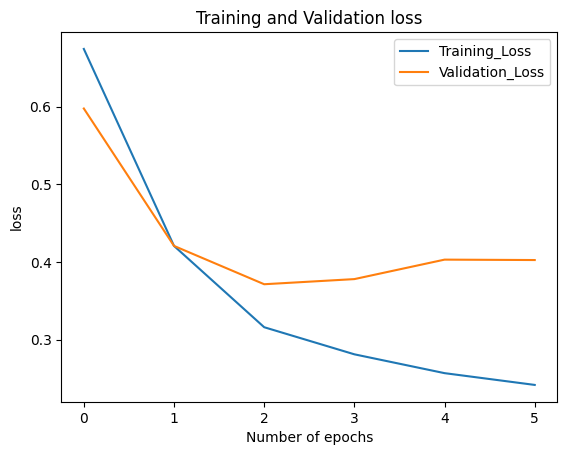

In [33]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

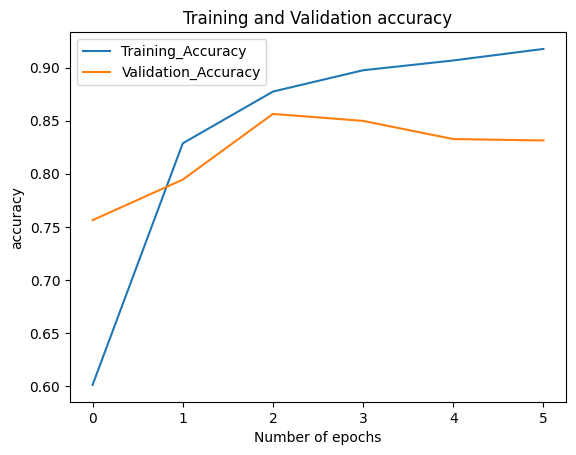

In [34]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [35]:
temp = model.predict(testing_padded)
prediction = []
for predict in temp:
    if predict < 0.5:
        prediction.append(0)
    else:
        prediction.append(1)

24/24 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(prediction, test_labels)
cm

array([[317,  57],
       [ 71, 314]])

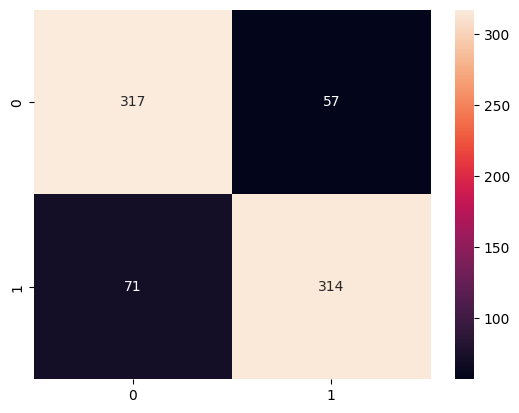

In [37]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [38]:
sample = testing_padded[0]
sample

array([ 83,  15, 276, 262, 205,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [39]:
sample.shape

(34,)

In [40]:
import numpy as np
sample = np.expand_dims(sample, axis=0)
sample.shape

(1, 34)

In [41]:
res = model.predict(sample)
res

1/1 [==============================] - 0s 20ms/step


array([[0.9915175]], dtype=float32)

In [42]:
sample = "Be the life of party"

def prepros(sample):
    print(sample)
    print("")
    sample = sample.lower()
    print(sample)
    sample = remove_punctuation(sample)
    print(sample)
    sample = tokenization(sample)
    print(sample)
    sample = remove_stopwords(sample)
    print(sample)
    sample = rem_em(sample)
    print(sample)
    return sample

sample = prepros(sample)

Be the life of party

be the life of party
be the life of party
['be', 'the', 'life', 'of', 'party']
['life', 'party']
['life', 'party']


In [43]:
sample_sequences = tokenizer.texts_to_sequences([sample])
print(sample_sequences)

sample_padded = pad_sequences (sample_sequences, maxlen = max_len, padding = 'post', truncating = 'post' )
print(sample_padded)

[[85]]
[[85  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]]


In [44]:
model.predict(sample_padded)

1/1 [==============================] - 0s 14ms/step


array([[0.55977947]], dtype=float32)

In [45]:
sample1 = "RT @TavianJordan: Summer '19 I'm coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I'm ready I'm ready I'm…"

In [46]:
sample1 = prepros(sample1)

RT @TavianJordan: Summer '19 I'm coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I'm ready I'm ready I'm…

rt @tavianjordan: summer '19 i'm coming for you ! no boring shit ! beach days, road trips, kickbacks and hot days ! i'm ready i'm ready i'm…
rt tavianjordan summer 19 im coming for you  no boring shit  beach days road trips kickbacks and hot days  im ready im ready im…
['rt', 'tavianjordan', 'summer', '19', 'im', 'coming', 'for', 'you', 'no', 'boring', 'shit', 'beach', 'days', 'road', 'trips', 'kickbacks', 'and', 'hot', 'days', 'im', 'ready', 'im', 'ready', 'im…']
['rt', 'tavianjordan', 'summer', '19', 'im', 'coming', 'boring', 'shit', 'beach', 'days', 'road', 'trips', 'kickbacks', 'hot', 'days', 'im', 'ready', 'im', 'ready', 'im…']
['rt', 'tavianjordan', 'summer', '19', 'im', 'coming', 'boring', 'shit', 'beach', 'days', 'road', 'trips', 'kickbacks', 'hot', 'days', 'im', 'ready', 'im', 'ready', 'im']


In [47]:
sample_sequences = tokenizer.texts_to_sequences([sample1])
print(sample_sequences)

sample_padded = pad_sequences (sample_sequences, maxlen = max_len, padding = 'post', truncating = 'post' )
print(sample_padded)


[[1, 148, 28, 100, 6, 112, 208, 112, 28, 172, 28, 172, 28]]
[[  1 148  28 100   6 112 208 112  28 172  28 172  28   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [48]:
model.predict(sample_padded)

1/1 [==============================] - 0s 16ms/step


array([[0.9760538]], dtype=float32)

# Task - 2

In [49]:
data = pd.read_csv("final_data.csv")
data.head()

,cleaned_tokens,task1,task2
0,"['hate', 'wen', 'females', 'hit', 'ah', 'nigga...",HOF,PRFN
1,"['rt', 'airjunebug', 'youre', 'bay', 'youre', ...",HOF,PRFN
2,"['rt', 'donaldjtrumpjr', 'dear', 'democrats', ...",NOT,NONE
3,"['rt', 'shelovetimothy', 'ain't', 'drugs', 'bo...",NOT,PRFN
4,"['rt', 'tavianjordan', 'summer', ''19', 'i'm',...",NOT,NONE


In [50]:
x = data['cleaned_tokens'].values
x

array(["['hate', 'wen', 'females', 'hit', 'ah', 'nigga', 'tht', 'bro', '', 'i'm', 'tryna', 'make', 'u', 'la', 'sweety', 'fuck', 'ah', 'bro']",
       "['rt', 'airjunebug', 'youre', 'bay', 'youre', 'really', 'ny', 'nigga', 'heart', 'w', 'supportcaleon', 'httpstcomz8baylnlf']",
       "['rt', 'donaldjtrumpjr', 'dear', 'democrats', 'american', 'people', 'aren't', 'stupid', 'know', 'spying', 'amount', 'gaslighting', 'change', 'th']",
       ...,
       "['rt', 'flytpa', 'breaking', 'news', 'tpa', 'get', 'even', 'better', 'plans', '2020', '', 'mothers', 'nursing', 'rooms', '', 'water', 'bottle', 'filling', 'st']",
       "['rt', 'starrtharapper', 'it's', 'hr', 'fuck', 'game', '', 'httpstcoaki6bw8qlz']",
       "['dont', 'know', 'iam', 'know', 'you']"], dtype=object)

In [51]:
Class = data['task2'].unique()
Class.sort()
print(Class)

['HATE' 'NONE' 'OFFN' 'PRFN']


In [52]:
y2 = data.iloc[:,-1].values
y2

array(['PRFN', 'PRFN', 'NONE', ..., 'NONE', 'PRFN', 'NONE'], dtype=object)

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() 
y2 = encoder.fit_transform(np.array(y2).reshape(-1,1)).toarray()

In [54]:
print(y2)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [55]:
# Map ham label as 0 and spam as 1
from sklearn.model_selection import train_test_split

train_msg, test_msg, train_labels, test_labels = train_test_split(df['cleaned_tokens'], y2, test_size=0.2, random_state=434, stratify=y2)

In [56]:
#Dense model architecture
#Dense model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Activation,Flatten

model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(4, activation='sigmoid'))

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [58]:
# fitting a dense spam detector model
from keras.callbacks import EarlyStopping

num_epochs = 50
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels))

Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 1.1231 - accuracy: 0.4853 - val_loss: 1.0544 - val_accuracy: 0.5152
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.4962 - val_loss: 1.0472 - val_accuracy: 0.5152
Epoch 3/50
95/95 [==============================] - 0s 3ms/step - loss: 1.0529 - accuracy: 0.5071 - val_loss: 1.0479 - val_accuracy: 0.5152
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.5120 - val_loss: 1.0464 - val_accuracy: 0.5152
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 1.0203 - accuracy: 0.5232 - val_loss: 1.0582 - val_accuracy: 0.5152
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - loss: 0.9915 - accuracy: 0.5236 - val_loss: 1.0711 - val_accuracy: 0.4796
Epoch 7/50
95/95 [==============================] - 0s 3ms/step - loss: 0.9409 - accuracy: 0.5717 - val_loss: 1.1184 - val_accuracy: 0.4769
Epoch 8/50
95/95 [==

In [59]:
model.save("model2.h5")

In [60]:
# Read as a dataframe 
import matplotlib.pyplot as plt
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

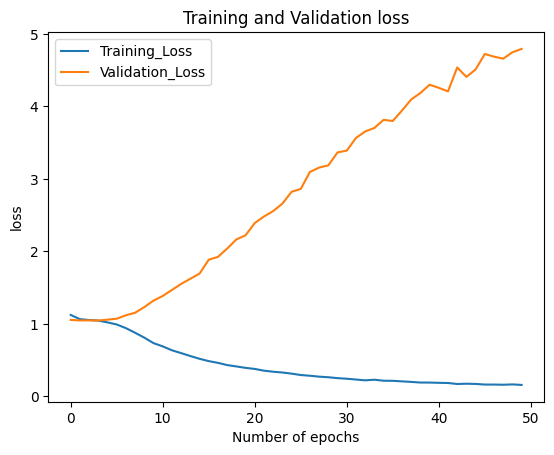

In [61]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

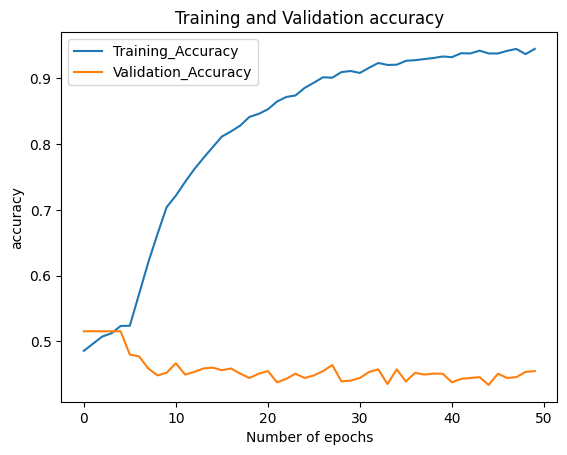

In [62]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [63]:
prediction = model.predict(testing_padded)

24/24 [==============================] - 0s 878us/step


In [64]:
prediction

array([[2.12051418e-05, 9.99922931e-01, 7.28743471e-05, 9.99433935e-01],
       [5.57340449e-03, 9.99260545e-01, 1.89048937e-03, 8.75909269e-01],
       [1.17629020e-06, 9.99216855e-01, 1.55287984e-04, 9.99988437e-01],
       ...,
       [1.37327835e-01, 6.79129601e-01, 3.15807909e-01, 8.15985024e-01],
       [1.07324595e-04, 9.99916077e-01, 1.16024072e-04, 9.94781017e-01],
       [8.71832013e-01, 2.29185298e-02, 9.38092530e-01, 1.64896354e-01]],
      dtype=float32)

In [65]:
sample1 = "@brewer383 @d_heard00 @daishatatianna I DONT NEED YOURE WHOLE LIFE STORY WHEN YOUR SHIT IS ON PUBLIC RECORD 😂😂😂 have a look yourself"

In [66]:
sample1 = prepros(sample1)

@brewer383 @d_heard00 @daishatatianna I DONT NEED YOURE WHOLE LIFE STORY WHEN YOUR SHIT IS ON PUBLIC RECORD 😂😂😂 have a look yourself

@brewer383 @d_heard00 @daishatatianna i dont need youre whole life story when your shit is on public record 😂😂😂 have a look yourself
brewer383 dheard00 daishatatianna i dont need youre whole life story when your shit is on public record 😂😂😂 have a look yourself
['brewer383', 'dheard00', 'daishatatianna', 'i', 'dont', 'need', 'youre', 'whole', 'life', 'story', 'when', 'your', 'shit', 'is', 'on', 'public', 'record', '😂😂😂', 'have', 'a', 'look', 'yourself']
['brewer383', 'dheard00', 'daishatatianna', 'dont', 'need', 'youre', 'whole', 'life', 'story', 'shit', 'public', 'record', '😂😂😂', 'look']
['brewer383', 'dheard00', 'daishatatianna', 'dont', 'need', 'youre', 'whole', 'life', 'story', 'shit', 'public', 'record', '', 'look']


In [67]:
sample_sequences = tokenizer.texts_to_sequences([sample1])
print(sample_sequences)

sample_padded = pad_sequences (sample_sequences, maxlen = max_len, padding = 'post', truncating = 'post' )
print(sample_padded)

[[30, 11, 19, 180, 85, 6, 342, 2, 34]]
[[ 30  11  19 180  85   6 342   2  34   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [68]:
result = model.predict(sample_padded, verbose=0)

In [69]:
result

array([[7.2263126e-13, 1.0000000e+00, 1.6966110e-12, 9.9999994e-01]],
      dtype=float32)

In [70]:
sample2 = "@Boogie2988 I'm assuming you are talking about GOT but I don't watch that show so I have no idea what you're talking about."

In [71]:
sample2 = prepros(sample2)

@Boogie2988 I'm assuming you are talking about GOT but I don't watch that show so I have no idea what you're talking about.

@boogie2988 i'm assuming you are talking about got but i don't watch that show so i have no idea what you're talking about.
boogie2988 im assuming you are talking about got but i dont watch that show so i have no idea what youre talking about
['boogie2988', 'im', 'assuming', 'you', 'are', 'talking', 'about', 'got', 'but', 'i', 'dont', 'watch', 'that', 'show', 'so', 'i', 'have', 'no', 'idea', 'what', 'youre', 'talking', 'about']
['boogie2988', 'im', 'assuming', 'talking', 'got', 'dont', 'watch', 'show', 'idea', 'youre', 'talking']
['boogie2988', 'im', 'assuming', 'talking', 'got', 'dont', 'watch', 'show', 'idea', 'youre', 'talking']


In [72]:
sample_sequences = tokenizer.texts_to_sequences([sample2])
print(sample_sequences)

sample_padded = pad_sequences (sample_sequences, maxlen = max_len, padding = 'post', truncating = 'post' )
print(sample_padded)

[[28, 165, 26, 30, 237, 72, 19, 165]]
[[ 28 165  26  30 237  72  19 165   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [73]:
result = model.predict(sample_padded, verbose=0)

In [74]:
result

array([[1.4374743e-05, 3.9069313e-05, 9.4487906e-01, 9.9999774e-01]],
      dtype=float32)

In [75]:
sample2 = "RT @DonaldJTrumpJr: Dear Democrats: The American people aren’t stupid, they know what spying is and no amount of gaslighting will change th…"

In [76]:
sample2 = prepros(sample2)

RT @DonaldJTrumpJr: Dear Democrats: The American people aren’t stupid, they know what spying is and no amount of gaslighting will change th…

rt @donaldjtrumpjr: dear democrats: the american people aren’t stupid, they know what spying is and no amount of gaslighting will change th…
rt donaldjtrumpjr dear democrats the american people aren’t stupid they know what spying is and no amount of gaslighting will change th…
['rt', 'donaldjtrumpjr', 'dear', 'democrats', 'the', 'american', 'people', 'aren’t', 'stupid', 'they', 'know', 'what', 'spying', 'is', 'and', 'no', 'amount', 'of', 'gaslighting', 'will', 'change', 'th…']
['rt', 'donaldjtrumpjr', 'dear', 'democrats', 'american', 'people', 'aren’t', 'stupid', 'know', 'spying', 'amount', 'gaslighting', 'change', 'th…']
['rt', 'donaldjtrumpjr', 'dear', 'democrats', 'american', 'people', 'aren't', 'stupid', 'know', 'spying', 'amount', 'gaslighting', 'change', 'th']


In [77]:
sample_sequences = tokenizer.texts_to_sequences([sample2])
print(sample_sequences)

sample_padded = pad_sequences (sample_sequences, maxlen = max_len, padding = 'post', truncating = 'post' )
print(sample_padded)

[[1, 15, 32, 14, 445, 164]]
[[  1  15  32  14 445 164   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [78]:
result = model.predict(sample_padded, verbose=0)

In [79]:
result

array([[2.2758961e-05, 5.1411008e-03, 4.7739318e-01, 9.9998927e-01]],
      dtype=float32)

In [80]:
val = np.argmax(result, axis=1)[0]
val

3